# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow opencv-python matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 1.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 3.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.8/208.8 MB 1.9 MB/s eta 0:00:0000:0100:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 1.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 1.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.4/242.4 kB 1.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 1.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 1.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 1

In [2]:
!pip list

Package                      Version
---------------------------- ---------------
absl-py                      2.1.0
anyio                        4.3.0
appnope                      0.1.4
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.2.0
Babel                        2.14.0
beautifulsoup4               4.12.3
bleach                       6.1.0
cachetools                   5.3.2
certifi                      2024.2.2
cffi                         1.16.0
charset-normalizer           3.3.2
comm                         0.2.1
contourpy                    1.2.0
cycler                       0.12.1
debugpy                      1.8.1
decorator                    5.1.1
defusedxml                   0.7.1
exceptiongroup               1.2.0
executing                    2.0.1
fastjsonschema               2.19

In [70]:
import tensorflow as tf
import os

In [71]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [72]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [73]:
import cv2
import imghdr

In [74]:
data_dir = 'data' 

In [75]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [76]:
for image_class in os.listdir(data_dir): 
    class_dir = os.path.join(data_dir, image_class)
    if not os.path.isdir(class_dir):
        continue # Skip if it's not a directory
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [77]:
import numpy as np
from matplotlib import pyplot as plt

In [78]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 242 files belonging to 2 classes.


In [79]:
data_iterator = data.as_numpy_iterator()

In [80]:
batch = data_iterator.next()

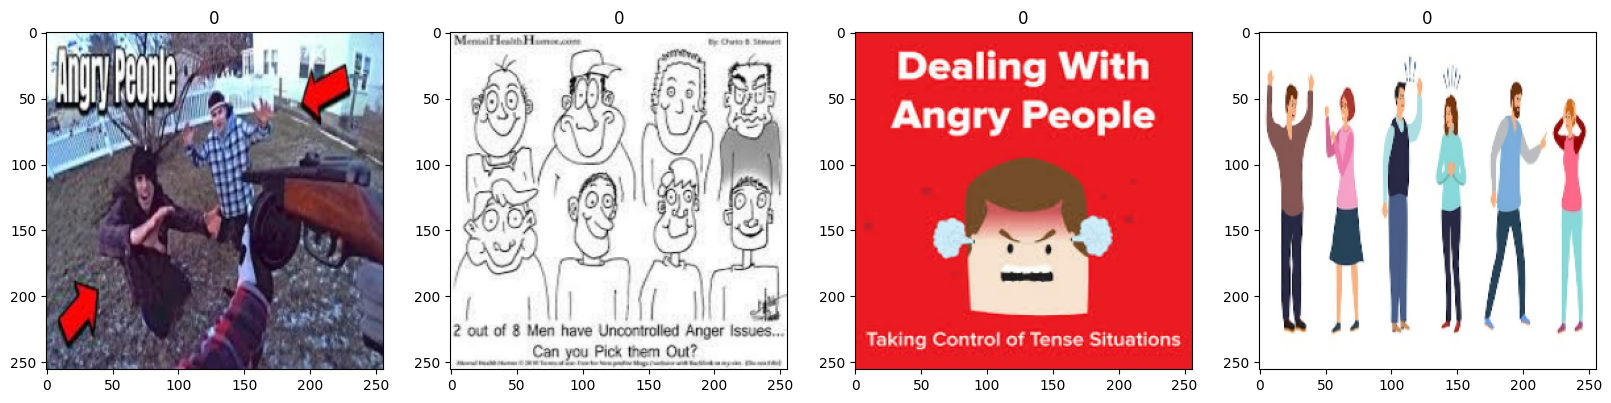

In [81]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [82]:
data = data.map(lambda x,y: (x/255, y))

In [83]:
data.as_numpy_iterator().next()



(array([[[[8.72325480e-01, 8.33109796e-01, 8.25266659e-01],
          [7.95640409e-01, 7.56424725e-01, 7.48581588e-01],
          [9.10963833e-01, 8.71748149e-01, 8.63905013e-01],
          ...,
          [1.47518381e-01, 1.08302698e-01, 1.00459561e-01],
          [1.55076683e-01, 1.15861006e-01, 1.08017862e-01],
          [1.19229428e-01, 8.00137371e-02, 7.21706003e-02]],
 
         [[8.28442156e-01, 7.89226472e-01, 7.81383336e-01],
          [8.79141033e-01, 8.39925349e-01, 8.32082212e-01],
          [8.24701071e-01, 7.85485387e-01, 7.77642250e-01],
          ...,
          [1.21008776e-01, 8.17930922e-02, 7.39499554e-02],
          [1.52942851e-01, 1.13727167e-01, 1.05884030e-01],
          [1.20065726e-01, 8.08500424e-02, 7.30069056e-02]],
 
         [[8.02327454e-01, 7.63111770e-01, 7.55268633e-01],
          [9.59629416e-01, 9.20413733e-01, 9.12570596e-01],
          [8.81621957e-01, 8.42406273e-01, 8.34563136e-01],
          ...,
          [1.86092839e-01, 1.46877155e-01, 1.3903

# 5. Split Data

In [84]:
len(data)

8

In [85]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [86]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [87]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [89]:
model = Sequential()

In [90]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [91]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [92]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

# 7. Train

In [93]:
logdir='logs'

In [94]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [95]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 [==============================] - 5s 819ms/step - loss: 2.5291 - accuracy: 0.5063 - val_loss: 0.8184 - val_accuracy: 0.3594
Epoch 2/20
5/5 [==============================] - 5s 845ms/step - loss: 0.7328 - accuracy: 0.4250 - val_loss: 0.6740 - val_accuracy: 0.6094
Epoch 3/20
5/5 [==============================] - 5s 871ms/step - loss: 0.6908 - accuracy: 0.5813 - val_loss: 0.6653 - val_accuracy: 0.6719
Epoch 4/20
5/5 [==============================] - 4s 783ms/step - loss: 0.6732 - accuracy: 0.6250 - val_loss: 0.6180 - val_accuracy: 0.7344
Epoch 5/20
5/5 [==============================] - 5s 842ms/step - loss: 0.6810 - accuracy: 0.5625 - val_loss: 0.6697 - val_accuracy: 0.6250
Epoch 6/20
5/5 [==============================] - 5s 787ms/step - loss: 0.6631 - accuracy: 0.6625 - val_loss: 0.6495 - val_accuracy: 0.5938
Epoch 7/20
5/5 [==============================] - 4s 784ms/step - loss: 0.6528 - accuracy: 0.6000 - val_loss: 0.6422 - val_accuracy: 0.5938
Epoch 8/20
5/5 [====

# 8. Plot Performance

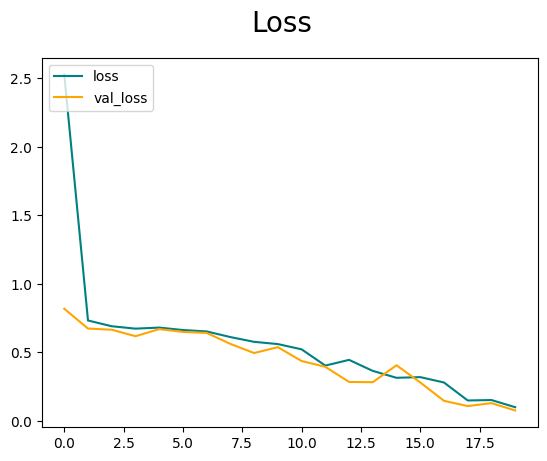

In [98]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

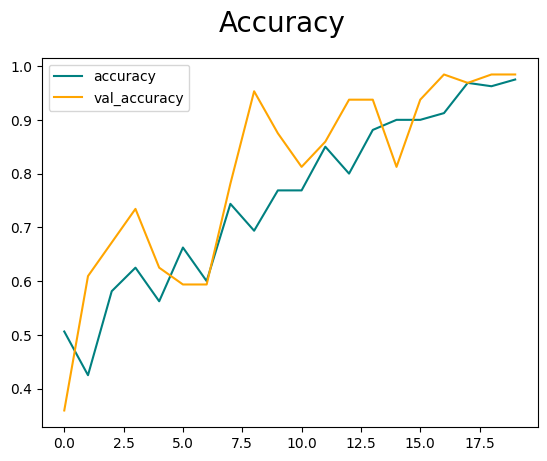

In [97]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [99]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [100]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [101]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 141ms/step


In [104]:
print(f'Precision:{pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision:1.0, Recall: 1.0, Accuracy: 1.0


# 10. Test

In [124]:
import cv2

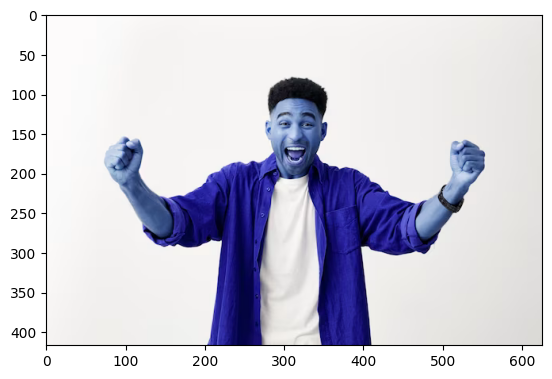

In [125]:
img = cv2.imread('excited_test.png')
plt.imshow(img)
plt.show()

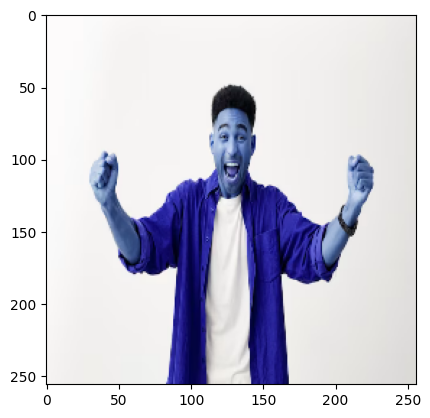

In [126]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [127]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 36ms/step


In [128]:
yhat

array([[0.9570483]], dtype=float32)

In [130]:
if yhat > 0.5: 
    print(f'Predicted class is Excited')
else:
    print(f'Predicted class is Angry')

Predicted class is Excited


# 11. Save the Model

In [131]:
from tensorflow.keras.models import load_model

In [133]:
model.save(os.path.join('models','angry_excited_classifier.keras'))